Exploratory data analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
df = pd.read_csv('data/DataSet_Lakas_Regression.csv')

In [3]:
df.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31


In [4]:
df.dtypes

county                      object
city                        object
postcode                   float64
property_type               object
property_subtype            object
property_condition_type     object
property_floor              object
building_floor_count        object
view_type                   object
orientation                 object
garden_access               object
heating_type                object
elevator_type               object
room_cnt                   float64
small_room_cnt             float64
created_at                  object
property_area              float64
balcony_area               float64
price_created_at           float64
ad_view_cnt                float64
active_days                float64
nr                           int64
dtype: object

In [5]:
df.heating_type.unique()

array(['tile stove (gas)', 'konvection gas burner',
       'central heating with own meter', 'central heating', nan,
       'district heating', 'gas furnace, circulating hot water',
       'electric', 'other', 'fan-coil', 'gas furnace'], dtype=object)

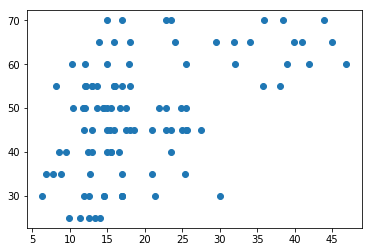

In [6]:
sampled_df = df.sample(100)
plt.scatter(sampled_df.price_created_at, sampled_df.property_area)
plt.show()

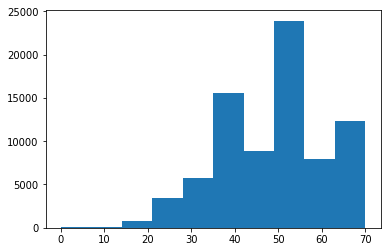

In [7]:
plt.hist(df.property_area)
plt.show()

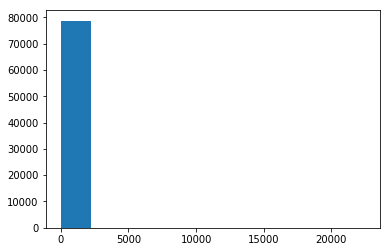

In [8]:
plt.hist(df.price_created_at)
plt.show()

In [9]:
df.describe()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
count,49672.000000,78670.000000,78417.000000,78670.000000,75467.000000,78670.000000,78670.000000,78670.000000,78670.000000
mean,1103.331354,1.474171,0.550901,48.412737,2.095207,20.054013,259.633202,44.172200,196349.123503
std,50.785029,0.768812,0.781998,12.771252,7.026138,107.135384,512.387061,47.832548,113305.500226
min,1011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,1064.000000,1.000000,0.000000,40.000000,0.000000,13.200000,42.000000,11.000000,97977.500000
50%,1101.000000,1.000000,0.000000,50.000000,0.000000,16.900000,103.000000,28.000000,196125.500000
75%,1142.000000,2.000000,1.000000,60.000000,3.000000,23.900000,263.000000,61.000000,294507.500000
max,1239.000000,68.000000,73.000000,70.000000,1115.000000,22500.000000,28096.000000,537.000000,394181.000000


Data cleaning

In [10]:
print(len(df))
condition = df.price_created_at <= 150
df = df[condition]
print(len(df))
condition = df.price_created_at >= 5
df = df[condition]
print(len(df))

print('property_area')

print(len(df))
condition = df.property_area >= 20
df = df[condition]
print(len(df))
condition = df.property_area <= 70
df = df[condition]
print(len(df))

78670
78657
78440
property_area
78440
78213
78213


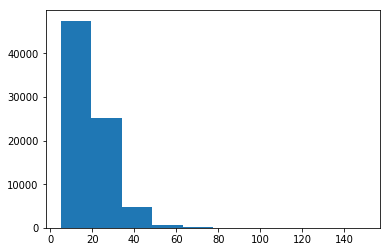

In [11]:
plt.hist(df.price_created_at)
plt.show()

In [65]:
target_v = ['price_created_at']
input_v = ['property_area', 'balcony_area', 'active_days', 'room_cnt', 'small_room_cnt']
x = df[input_v].fillna(0).values
y = df[target_v].values

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1275)

In [67]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
coef = model.coef_[0][0]
intercept = model.intercept_[0]
print(f'y = {coef} * x + {intercept}')

y = 0.31693320732071295 * x + 3.6580146544190377


Model evaluation

In [68]:
y_val_ = model.predict(x_val)

In [69]:
np.mean(np.abs((y_val - y_val_) / y_val))

0.3254722986892493

In [70]:
model.score(x_val, y_val)

0.22090063048838074

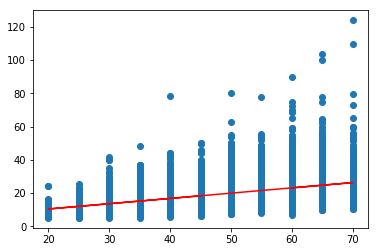

In [35]:
plt.scatter(x_val, y_val)
plt.plot(x_val, y_val_, color='Red')
plt.show()